# Packages and Configurations

In [1]:
import astro_util
import numpy as np
import matplotlib as mpl
from astropy.io import fits
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath, physics}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18) 
plt.rc("figure", titlesize=20)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

In [2]:
data = fits.open("data/stars.fits")[0].data

# Star Centers and Cropping

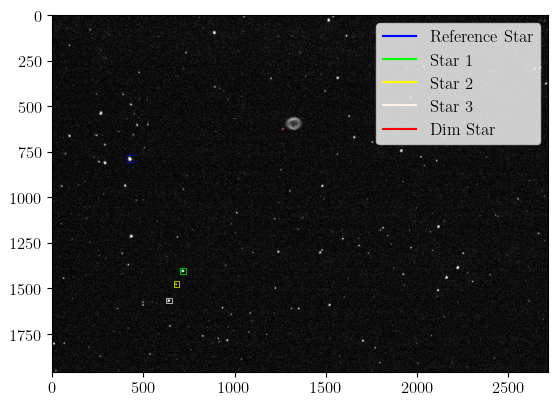

In [3]:
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')

# reference star
ax.add_patch(mpl.patches.Rectangle(
    (410, 770), 35, 35, lw=0.5, color="blue", fill=False, clip_on=False))
# bright stars
ax.add_patch(mpl.patches.Rectangle(
    (700, 1385), 35, 35, lw=0.5, color="lime", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (665, 1460), 30, 30, lw=0.5, color="yellow", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (625, 1550), 30, 30, lw=0.5, color="linen", fill=False, clip_on=False))
# dim star
ax.add_patch(mpl.patches.Rectangle(
    (1259, 619), 11, 11, lw=0.2, ec="red", fill=False, clip_on=False))

ax.plot([], [], color="blue", label=f"Reference Star")
ax.plot([], [], color="lime", label=f"Star 1")
ax.plot([], [], color="yellow", label=f"Star 2")
ax.plot([], [], color="linen", label=f"Star 3")
ax.plot([], [], color="red", label=f"Dim Star")
ax.legend()

plt.savefig("fig/crop.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [4]:
reference_center = astro_util.find_center_of_mass(data[770:806, 410:446])
star1_center = astro_util.find_center_of_mass(data[1385:1421, 700:736])
star2_center = astro_util.find_center_of_mass(data[1460:1491, 665:696])
star3_center = astro_util.find_center_of_mass(data[1550:1581, 625:656])
dim_star_center = astro_util.find_center_of_mass(data[620:631, 1258:1269])

reference_center = (reference_center[0] + 410, reference_center[1] + 770)
star1_center = (star1_center[0] + 700, star1_center[1] + 1385)
star2_center = (star2_center[0] + 665, star2_center[1] + 1460)
star3_center = (star3_center[0] + 625, star3_center[1] + 1550)
dim_star_center = (dim_star_center[0] + 1258, dim_star_center[1] + 620)

# Aperture Photometry

In [5]:
reference_photometry = astro_util.get_aperture_photometry_magnitude(
    data, reference_center)
star1_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star1_center)
star2_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star2_center)
star3_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star3_center)
dim_star_photometry = astro_util.get_aperture_photometry_magnitude(
    data, dim_star_center)

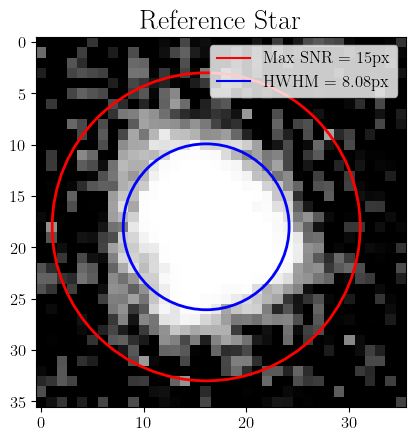

In [6]:
fig, ax = plt.subplots()
ax.imshow(data[770:806, 410:446], cmap="gray")

center = astro_util.find_center_of_mass(data[770:806, 410:446])
hwhm = astro_util.get_hwhm(data, reference_center)

ax.add_patch(mpl.patches.Circle(
    center, reference_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(
    center, hwhm, color="blue", fill=False, lw=2))

ax.plot([], [], color="red", label=f"Max SNR = {reference_photometry[2]}px")
ax.plot([], [], color="blue", label=f"HWHM = {hwhm:.2f}px")
ax.legend()

ax.set_title("Reference Star")
plt.savefig("fig/reference.pdf", bbox_inches="tight", dpi=300)
plt.show()

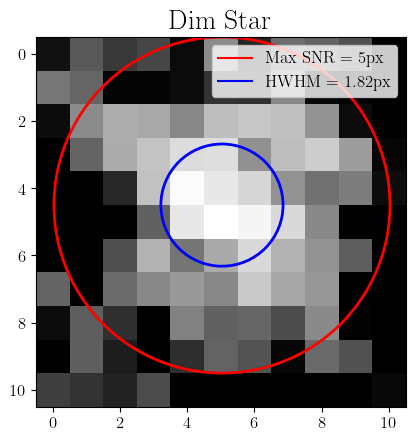

In [7]:
fig, ax = plt.subplots()
ax.imshow(data[620:631, 1258:1269], cmap="gray")

center = astro_util.find_center_of_mass(data[620:631, 1258:1269])
hwhm = astro_util.get_hwhm(data, dim_star_center, crop_radius=5)

ax.add_patch(mpl.patches.Circle(
    center, dim_star_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(
    center, hwhm, color="blue", fill=False, lw=2))

ax.plot([], [], color="red", label=f"Max SNR = {dim_star_photometry[2]}px")
ax.plot([], [], color="blue", label=f"HWHM = {hwhm:.2f}px")
ax.legend()

ax.set_title("Dim Star")
plt.savefig("fig/dim.pdf", bbox_inches="tight", dpi=300)
plt.show()

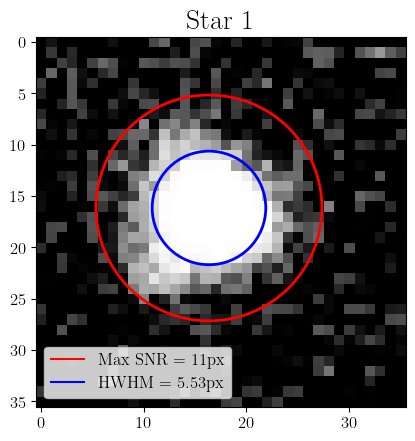

In [8]:
fig, ax = plt.subplots()
ax.imshow(data[1385:1421, 700:736], cmap="gray")

center = astro_util.find_center_of_mass(data[1385:1421, 700:736])
hwhm = astro_util.get_hwhm(data, star1_center, crop_radius=5)

ax.add_patch(mpl.patches.Circle(
    center, star1_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(
    center, hwhm, color="blue", fill=False, lw=2))

ax.plot([], [], color="red", label=f"Max SNR = {star1_photometry[2]}px")
ax.plot([], [], color="blue", label=f"HWHM = {hwhm:.2f}px")
ax.legend()

ax.set_title("Star 1")
plt.savefig("fig/star1.pdf", bbox_inches="tight", dpi=300)
plt.show()

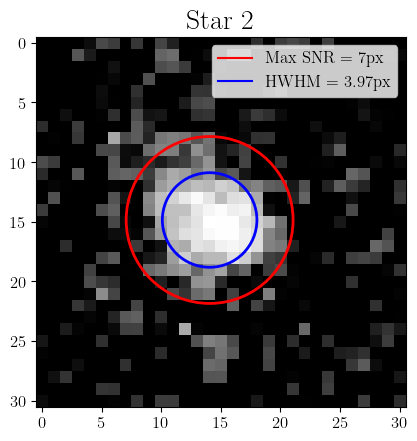

In [9]:
fig, ax = plt.subplots()
ax.imshow(data[1460:1491, 665:696], cmap="gray")

center = astro_util.find_center_of_mass(data[1460:1491, 665:696])
hwhm = astro_util.get_hwhm(data, star2_center, crop_radius=5)

ax.add_patch(mpl.patches.Circle(
    center, star2_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(
    center, hwhm, color="blue", fill=False, lw=2))

ax.plot([], [], color="red", label=f"Max SNR = {star2_photometry[2]}px")
ax.plot([], [], color="blue", label=f"HWHM = {hwhm:.2f}px")
ax.legend()

ax.set_title("Star 2")
plt.savefig("fig/star2.pdf", bbox_inches="tight", dpi=300)
plt.show()

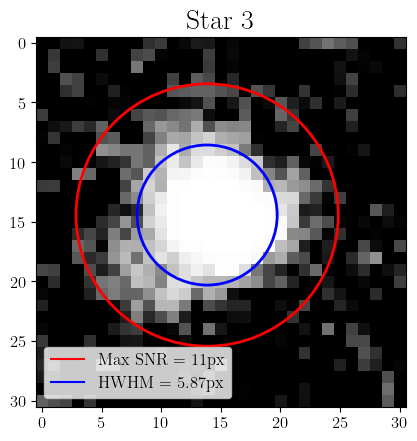

In [10]:
fig, ax = plt.subplots()
ax.imshow(data[1550:1581, 625:656], cmap="gray")

center = astro_util.find_center_of_mass(data[1550:1581, 625:656])
hwhm = astro_util.get_hwhm(data, star3_center, crop_radius=5)

ax.add_patch(mpl.patches.Circle(
    center, star3_photometry[2], color="red", fill=False, lw=2))
ax.add_patch(mpl.patches.Circle(
    center, hwhm, color="blue", fill=False, lw=2))

ax.plot([], [], color="red", label=f"Max SNR = {star3_photometry[2]}px")
ax.plot([], [], color="blue", label=f"HWHM = {hwhm:.2f}px")
ax.legend()

ax.set_title("Star 3")
plt.savefig("fig/star3.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [11]:
print(f"Star 1: {8.88 + star1_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star1_photometry[1]**2)}")
print(f"Star 2: {8.88 + star2_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star2_photometry[1]**2)}")
print(f"Star 3: {8.88 + star3_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star3_photometry[1]**2)}")
print(f"Dim Star: {8.88 + dim_star_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + dim_star_photometry[1]**2)}")

Star 1: 9.475382333741212, Error = 0.10678112923125715
Star 2: 10.537213720066447, Error = 0.15152270898551926
Star 3: 9.590758251175622, Error = 0.11105756097767179
Dim Star: 11.337219555710938, Error = 0.21120296049575682


In [12]:
hwhm = round(astro_util.get_hwhm(data, reference_center))
reference_photometry = astro_util.get_aperture_photometry_magnitude(
    data, reference_center, radius_min=hwhm, radius_max=hwhm)
hwhm = round(astro_util.get_hwhm(data, star1_center))
star1_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star1_center, radius_min=hwhm, radius_max=hwhm)
hwhm = round(astro_util.get_hwhm(data, star2_center))
star2_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star2_center, radius_min=hwhm, radius_max=hwhm)
hwhm = round(astro_util.get_hwhm(data, star3_center))
star3_photometry = astro_util.get_aperture_photometry_magnitude(
    data, star3_center, radius_min=hwhm, radius_max=hwhm)
hwhm = round(astro_util.get_hwhm(data, dim_star_center))
dim_star_photometry = astro_util.get_aperture_photometry_magnitude(
    data, dim_star_center, radius_min=hwhm, radius_max=hwhm)

In [13]:
print(f"Star 1: {8.88 + star1_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star1_photometry[1]**2)}")
print(f"Star 2: {8.88 + star2_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star2_photometry[1]**2)}")
print(f"Star 3: {8.88 + star3_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + star3_photometry[1]**2)}")
print(f"Dim Star: {8.88 + dim_star_photometry[0] - reference_photometry[0]}, Error = "
      f"{np.sqrt(reference_photometry[1]**2 + dim_star_photometry[1]**2)}")

Star 1: 9.517635018446793, Error = 0.13770421365003324
Star 2: 10.602820775965085, Error = 0.20305035015489478
Star 3: 9.551592345743895, Error = 0.13895798204504303
Dim Star: 12.213333434705795, Error = 0.41048847475963673
